In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from yellowbrick.regressor import ResidualsPlot
from math import pi

- cleaning
- descriptive statistics and visualization
- modelling (linear, maybe logistic as well) linearde overall ve value için 2 ayrı modelleme
- visualization of the model

**Importing and cleaning data**

In [117]:
fifa = pd.read_csv('fifa.csv',index_col=0)

In [118]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [150]:
fifa.shape

(18207, 88)

In [162]:
fifa = fifa[['Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage',
       'Preferred Foot', 'Position', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [155]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             18207 non-null  object 
 1   Age              18207 non-null  int64  
 2   Nationality      18207 non-null  object 
 3   Overall          18207 non-null  int64  
 4   Potential        18207 non-null  int64  
 5   Club             17966 non-null  object 
 6   Value            18207 non-null  object 
 7   Wage             18207 non-null  object 
 8   Preferred Foot   18159 non-null  object 
 9   Skill Moves      18159 non-null  float64
 10  Position         18147 non-null  object 
 11  Crossing         18159 non-null  float64
 12  Finishing        18159 non-null  float64
 13  HeadingAccuracy  18159 non-null  float64
 14  ShortPassing     18159 non-null  float64
 15  Volleys          18159 non-null  float64
 16  Dribbling        18159 non-null  float64
 17  Curve       

In [156]:
# rows with any NaN value
fifa[fifa.isna().any(axis=1)]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
452,L. Paredes,24,Argentina,80,85,NaN,€0,€0,Right,4.0,...,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0
538,A. Granqvist,33,Sweden,80,80,NaN,€0,€0,Right,2.0,...,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0
568,A. Lunev,26,Russia,79,81,NaN,€0,€0,Right,1.0,...,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0
677,I. Smolnikov,29,Russia,79,79,NaN,€0,€0,Right,3.0,...,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0
874,A. Dzyuba,29,Russia,78,78,NaN,€0,€0,Right,3.0,...,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,V. Kaith,21,India,55,64,NaN,€0,€0,Right,1.0,...,13.0,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0
17215,K. Taimi,26,Finland,55,57,NaN,€0,€0,Right,2.0,...,33.0,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0
17339,S. Passi,23,India,54,63,NaN,€0,€0,Right,2.0,...,58.0,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0
17436,D. Lalhlimpuia,20,India,54,67,NaN,€0,€0,Right,2.0,...,55.0,46.0,26.0,17.0,13.0,7.0,8.0,12.0,11.0,11.0


In [157]:
#changing the dtype of value column
fifa['Value'] = fifa['Value'].apply(lambda x: x[1:])
fifa["Wage"] = fifa["Wage"].apply(lambda x: x[1:])

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

fifa['Value'] = fifa['Value'].apply(value_to_float)
fifa['Wage'] = fifa['Wage'].apply(value_to_float)

In [158]:
# removing NaNs
fifa.dropna(inplace=True)

**Exploratory Analysis**

In [159]:
fifa.describe().apply(lambda x: x.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
Age,17918.00000,25.10526,4.67537,16.00000,21.00000,25.00000,28.00000,45.00000
Overall,17918.00000,66.23680,6.92924,46.00000,62.00000,66.00000,71.00000,94.00000
Potential,17918.00000,71.32933,6.14410,48.00000,67.00000,71.00000,75.00000,95.00000
Value,17918.00000,2448628.75321,5631804.20916,0.00000,325000.00000,700000.00000,2100000.00000,118500000.00000
Wage,17918.00000,9883.74819,22142.76899,1000.00000,1000.00000,3000.00000,9000.00000,565000.00000
Skill Moves,17918.00000,2.36288,0.75631,1.00000,2.00000,2.00000,3.00000,5.00000
Crossing,17918.00000,49.74886,18.35499,5.00000,38.00000,54.00000,64.00000,93.00000
Finishing,17918.00000,45.58115,19.51253,2.00000,30.00000,49.00000,62.00000,95.00000
HeadingAccuracy,17918.00000,52.29529,17.36782,4.00000,44.00000,56.00000,64.00000,94.00000
ShortPassing,17918.00000,58.71342,14.68034,7.00000,54.00000,62.00000,68.00000,93.00000


In [163]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17918 non-null  object 
 1   Age              17918 non-null  int64  
 2   Nationality      17918 non-null  object 
 3   Overall          17918 non-null  int64  
 4   Potential        17918 non-null  int64  
 5   Club             17918 non-null  object 
 6   Value            17918 non-null  float64
 7   Wage             17918 non-null  float64
 8   Preferred Foot   17918 non-null  object 
 9   Position         17918 non-null  object 
 10  Crossing         17918 non-null  float64
 11  Finishing        17918 non-null  float64
 12  HeadingAccuracy  17918 non-null  float64
 13  ShortPassing     17918 non-null  float64
 14  Volleys          17918 non-null  float64
 15  Dribbling        17918 non-null  float64
 16  Curve            17918 non-null  float64
 17  FKAccuracy  

Nationalities of Players

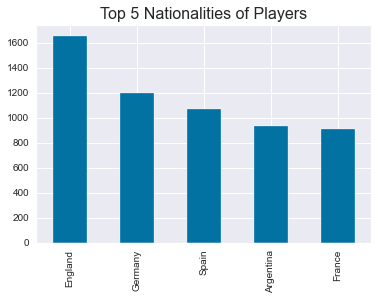

In [164]:
fifa["Nationality"].value_counts().head().plot(kind="bar")
plt.title("Top 5 Nationalities of Players",size=16)
plt.show()

Players with highest values across columns

In [169]:
cols = list(fifa.select_dtypes(include=np.number).columns[1:])

In [170]:
i=0
while i < len(cols):
    print('Highest Player in {0} : {1}'.format(cols[i],fifa.groupby("Name")[cols[i]].max().idxmax()))
    i += 1

Highest Player in Overall : Cristiano Ronaldo
Highest Player in Potential : K. Mbappé
Highest Player in Value : Neymar Jr
Highest Player in Wage : L. Messi
Highest Player in Crossing : K. De Bruyne
Highest Player in Finishing : L. Messi
Highest Player in HeadingAccuracy : B. Dost
Highest Player in ShortPassing : David Silva
Highest Player in Volleys : E. Cavani
Highest Player in Dribbling : L. Messi
Highest Player in Curve : Quaresma
Highest Player in FKAccuracy : L. Messi
Highest Player in LongPassing : T. Kroos
Highest Player in BallControl : L. Messi
Highest Player in Acceleration : Adama
Highest Player in SprintSpeed : Adama
Highest Player in Agility : Neymar Jr
Highest Player in Reactions : Cristiano Ronaldo
Highest Player in Balance : Bernard
Highest Player in ShotPower : Cristiano Ronaldo
Highest Player in Jumping : Cristiano Ronaldo
Highest Player in Stamina : F. Kessié
Highest Player in Strength : A. Akinfenwa
Highest Player in LongShots : L. Messi
Highest Player in Aggression

Heatmap for non-goalkeepers

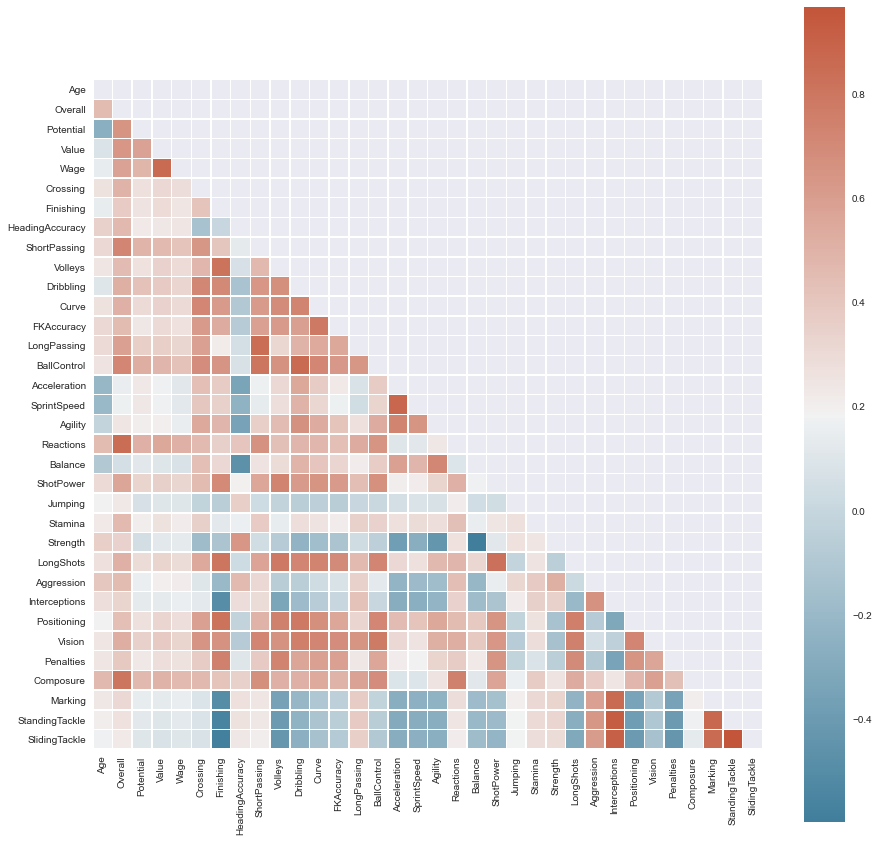

In [183]:
corr = fifa[fifa["Position"]!="GK"][list(fifa.select_dtypes(include=np.number).columns[:-5])].corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True)
plt.show()

Heatmap for goalkeepers

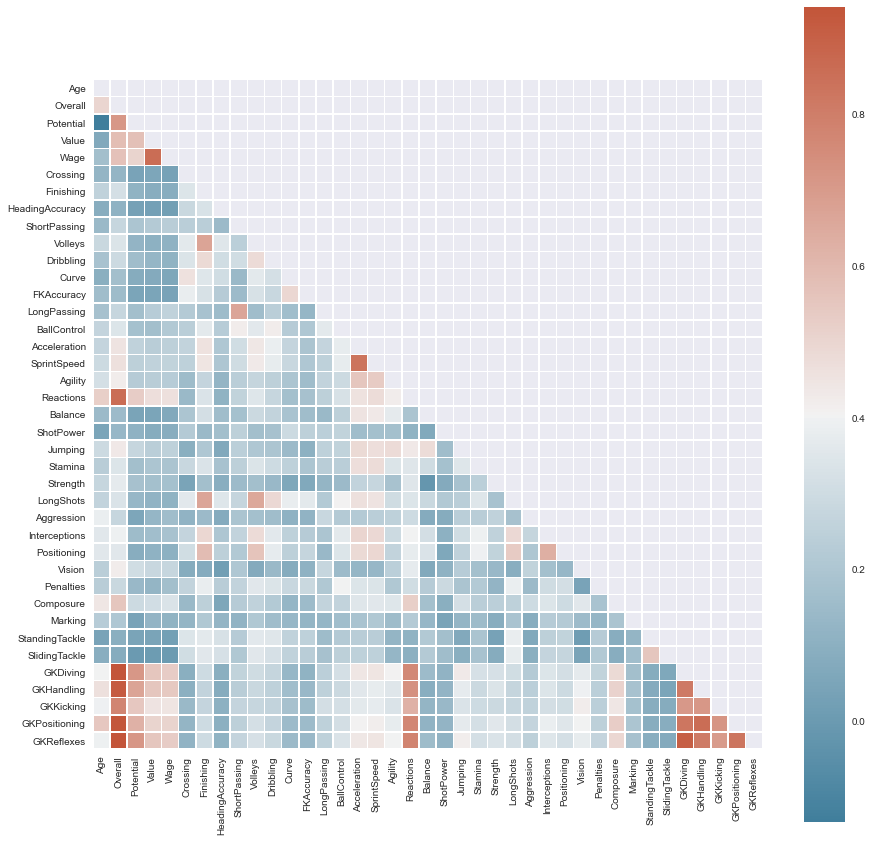

In [184]:
corr = fifa[fifa["Position"]=="GK"].corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True)
plt.show()

Overall and Finishing

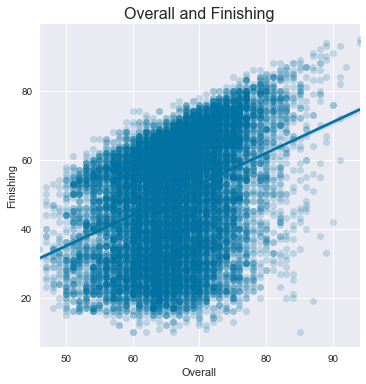

In [197]:
sns.lmplot(x="Overall",y="Finishing",data=fifa[fifa["Position"]!="GK"],scatter_kws = {"alpha":0.2})
plt.title("Overall and Finishing",size=16)
plt.show()

Value and Wage

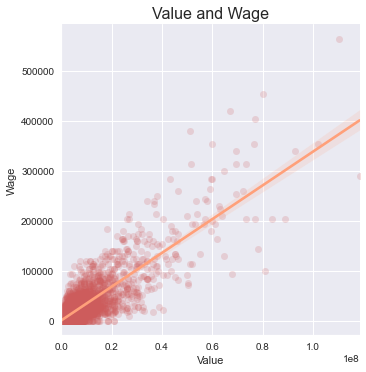

In [203]:
sns.lmplot(x="Value",y="Wage",data=fifa,scatter_kws = {"alpha":0.2,"color":"indianred"},line_kws = {"color":"lightsalmon"})
plt.title("Value and Wage",size=16)
plt.show()